# Unveiling Amazon Consumer Behavior

## Analysis

In this analysis, I delve into the Amazon customer behavior dataset to uncover insights related to cart behavior, cart abandonment, and completion rates. Understanding customer behavior on the platform is crucial for optimizing user experience and enhancing sales strategies. As per the results below, I think that the folowing inplications should be taken into consideration. 

**Browsing Optimization:** Given the high engagement with browsing, Amazon could consider enhancing the browsing experience, offering personalized content, and optimizing search result exploration to drive conversions.

**Cart Abandonment:** Understanding the common abandonment factors, such as price sensitivity and shipping costs, provides insights for targeted strategies to reduce cart abandonment rates. Amazon can offer competitive prices, transparent shipping costs, and effective price comparison tools to mitigate these factors.

**Age-Specific Strategies:** Tailoring strategies to age groups can be effective. For example, offering deals and promotions to price-sensitive younger customers, and focusing on clear value propositions for middle-aged customers.

**Enhancing Cart Completion:** The weak positive correlation between adding items to the cart and completing the purchase suggests an opportunity to encourage more frequent cart additions. Amazon could experiment with targeted incentives for customers who add items to their cart but do not complete their purchases.

**Saved for Later Feature:** While most customers do not use this feature, Amazon could explore ways to promote the "Save for Later" function and enhance its utility. It might be particularly appealing to those who frequently engage with this feature.

In conclusion, the analysis of Amazon's customer behavior dataset has revealed valuable insights into cart behavior and abandonment rates. These findings provide a foundation for Amazon to refine its strategies, enhance the customer experience, and increase conversion rates, ultimately boosting its overall success.

### Data Exploration and Cleaning

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import seaborn as sns
import scipy.stats as stats

In [3]:
# Output File (CSV)
consumer_behavior_path = "sources/Amazon Customer Behavior Survey.csv"

# Read the data
consumer_behavior = pd.read_csv(consumer_behavior_path)

# Convert the Amazon Consumer Behavior data into a Pandas DataFrame
consumer_behavior_df = pd.DataFrame(consumer_behavior)

# Drop any rows with null values
consumer_behavior_df.dropna()

# Display the data table for preview
consumer_behavior_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [4]:
# Data info
consumer_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [5]:
# Purchase_Frequency values
consumer_behavior_df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few times a month         203
Less than once a month    124
Once a week               112
Once a month              107
Multiple times a week      56
Name: count, dtype: int64

In [6]:
# Add_to_Cart_Browsing values
consumer_behavior_df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64

In [7]:
# Cart_Completion_Frequency values
consumer_behavior_df['Cart_Completion_Frequency'].value_counts()

Cart_Completion_Frequency
Sometimes    304
Often        158
Rarely        72
Always        47
Never         21
Name: count, dtype: int64

In [8]:
# Cart_Abandonment_Factors values
consumer_behavior_df['Cart_Abandonment_Factors'].value_counts()

Cart_Abandonment_Factors
Found a better price elsewhere                255
Changed my mind or no longer need the item    241
High shipping costs                            70
others                                         36
Name: count, dtype: int64

In [9]:
# Saveforlater_Frequency values
consumer_behavior_df['Saveforlater_Frequency'].value_counts()

Saveforlater_Frequency
Sometimes    251
Often        156
Rarely        82
Never         59
Always        54
Name: count, dtype: int64

### Carts behavior analysis

In [10]:
# Create DataFrame copying relevant columns for cart behavior analysis
carts_df = consumer_behavior_df[['age','Gender','Purchase_Frequency','Add_to_Cart_Browsing','Cart_Completion_Frequency','Cart_Abandonment_Factors','Saveforlater_Frequency','Shopping_Satisfaction']].copy()

# Display the data table for preview
carts_df.head()

,age,Gender,Purchase_Frequency,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Shopping_Satisfaction
0,23,Female,Few times a month,Yes,Sometimes,Found a better price elsewhere,Sometimes,1
1,23,Female,Once a month,Yes,Often,High shipping costs,Rarely,2
2,24,Prefer not to say,Few times a month,Yes,Sometimes,Found a better price elsewhere,Rarely,3
3,24,Female,Once a month,Maybe,Sometimes,Found a better price elsewhere,Sometimes,4
4,22,Female,Less than once a month,Yes,Sometimes,High shipping costs,Rarely,2


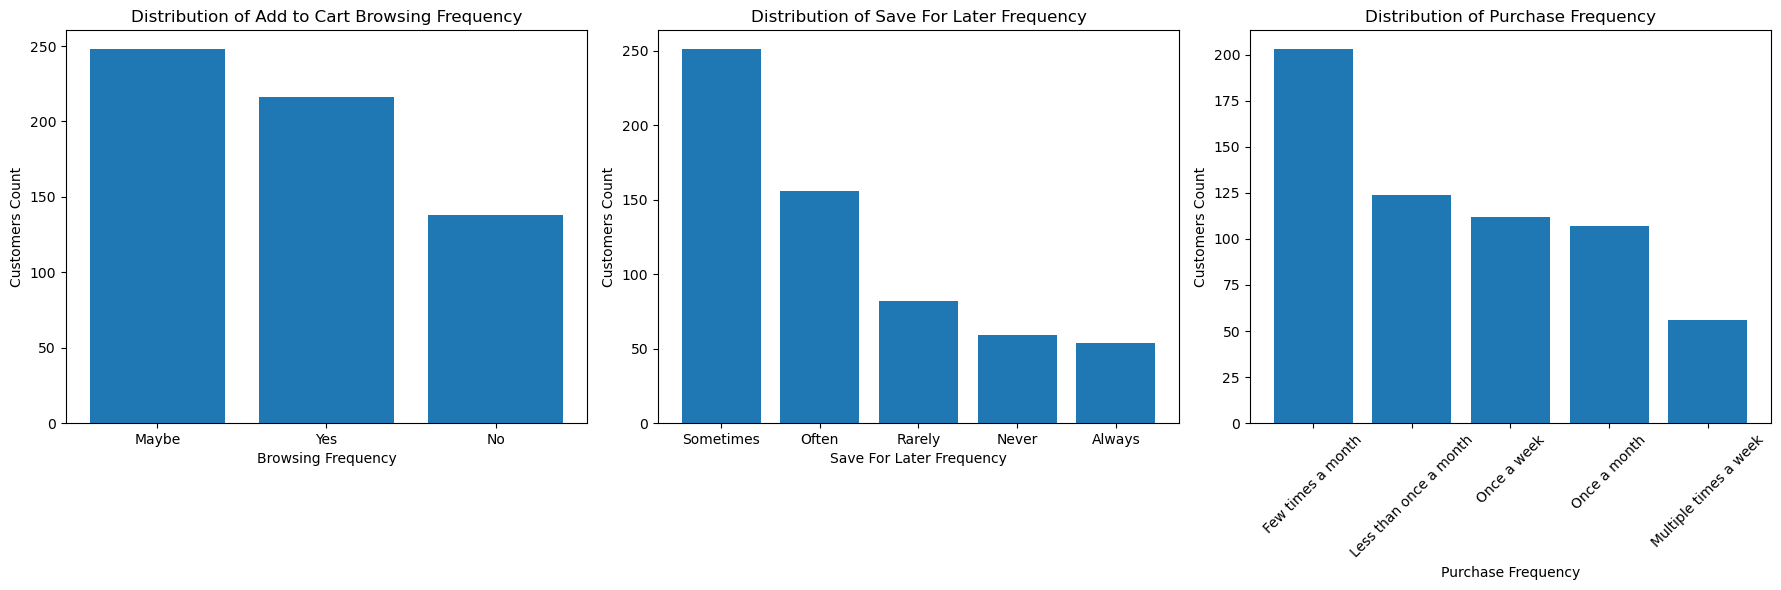

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,6))

# Creating a bar chart for customers in each browsing frequency 
browsing_frequency_counts = carts_df['Add_to_Cart_Browsing'].value_counts()

# Creating the bar chart
ax1.bar(browsing_frequency_counts.index, browsing_frequency_counts)
ax1.set_ylabel('Customers Count')
ax1.set_xlabel('Browsing Frequency')
ax1.set_title('Distribution of Add to Cart Browsing Frequency')


# Creating a bar chart for customers in each Saveforlater_Frequency
saveforlater_frequency_counts = carts_df['Saveforlater_Frequency'].value_counts()

# Creating the bar chart
ax2.bar(saveforlater_frequency_counts.index, saveforlater_frequency_counts)
ax2.set_ylabel('Customers Count')
ax2.set_xlabel('Save For Later Frequency')
ax2.set_title('Distribution of Save For Later Frequency')


# Creating a bar chart for customers in each purchase frequency
purchase_frequency_counts = carts_df['Purchase_Frequency'].value_counts()

# Creating the bar chart
ax3.bar(purchase_frequency_counts.index, purchase_frequency_counts)
ax3.set_ylabel('Customers Count')
ax3.set_xlabel('Purchase Frequency')
ax3.set_title('Distribution of Purchase Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Distribution of Browsing Frequency** A common behavior among customers is "Yes," indicating that many customers frequently engage in browsing activities on your platform.There is a substantial number of customers who browse "Maybe," suggesting a moderate level of browsing engagement.A smaller group of customers do not engage in browsing, as indicated by the "No" category.

**Distribution of Save For Later Frequency** "Sometimes" is the most common behavior among customers, indicating that a significant number of customers save items for later occasionally."Often" is the next most frequent behavior, suggesting that a substantial portion of customers frequently uses the "Save for Later" feature.Fewer customers use "Rarely", "Never" or "Always," indicating that these behaviors are less common.

**Distribution of Purchase Frequency** While "Few times a month" is the most common purchase frequency among the customers, there are customers who make purchases less frequently, such as "Less than once a month,","Once a week" and "Once a month", this suggests that a significant portion of customers shops infrequently."Multiple times a week" has the smallest number of customers. This suggests that a smaller group of customers shops very frequently.

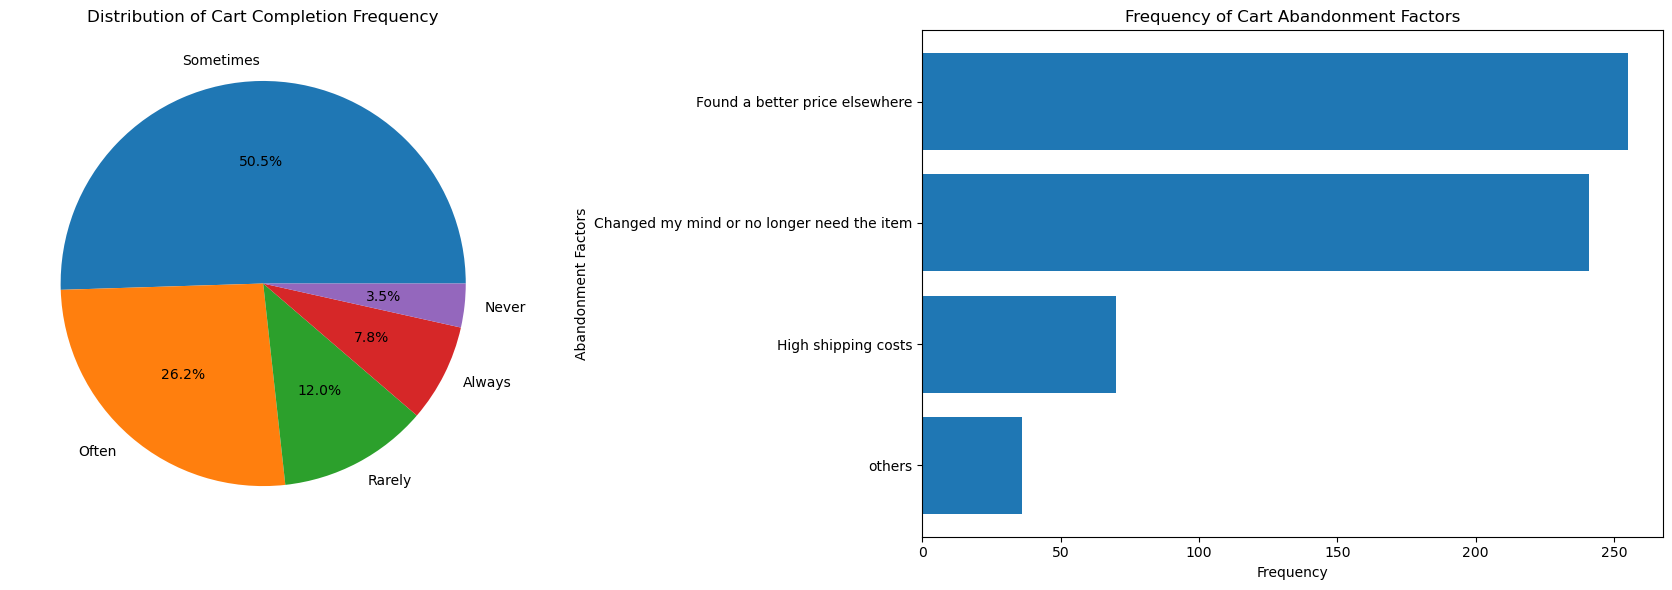

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

# Creating a pie chart for customers in Cart_Completion_Frequency 
cart_completion_frequency_counts = carts_df['Cart_Completion_Frequency'].value_counts()

# Creating the pie chart
ax1.pie(cart_completion_frequency_counts, labels=cart_completion_frequency_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Cart Completion Frequency')


# Creating an horizontal bar chart for customers in Cart Abandonment Factors
abandonment_factor_counts = carts_df['Cart_Abandonment_Factors'].value_counts().sort_values(ascending=True)

# Creating the horizontal bar chart
ax2.barh(abandonment_factor_counts.index, abandonment_factor_counts)


# Customize the chart
ax2.set_title('Frequency of Cart Abandonment Factors')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Abandonment Factors')
ax2.set_yticks(abandonment_factor_counts.index)

plt.tight_layout()
plt.show()

**Distribution of Cart Completion Frequency** The most common behavior among customers is completing their carts "Sometimes." This suggests that a significant number of customers complete their purchases on occasion but not every time.There is a range of cart completion frequencies, with customers falling into categories like "Often," "Rarely," and "Always." This indicates that customers exhibit different levels of cart completion consistency. While "Never" is the least common completion frequency, there are still some customers who rarely complete their carts.

**Frequency of Cart Abandonment Factors** The most frequent reasons for cart abandonment among customers are "Found a better price elsewhere", this indicate that customers are price-sensitive and actively compare prices before making a purchase decision."Changed my mind or no longer need the item" is also a common factor. This may indicate that customers are unsure about their purchase decisions or their needs change after adding items to the cart. "High shipping costs" are a factor in some cart abandonments, this suggests that shipping costs can impact the final decision to complete a purchase."Others" account for a smaller portion of abandonment factors.  

### Summary Statistics

Pearson Correlation Coefficient: 0.00
P-Value: 0.9066


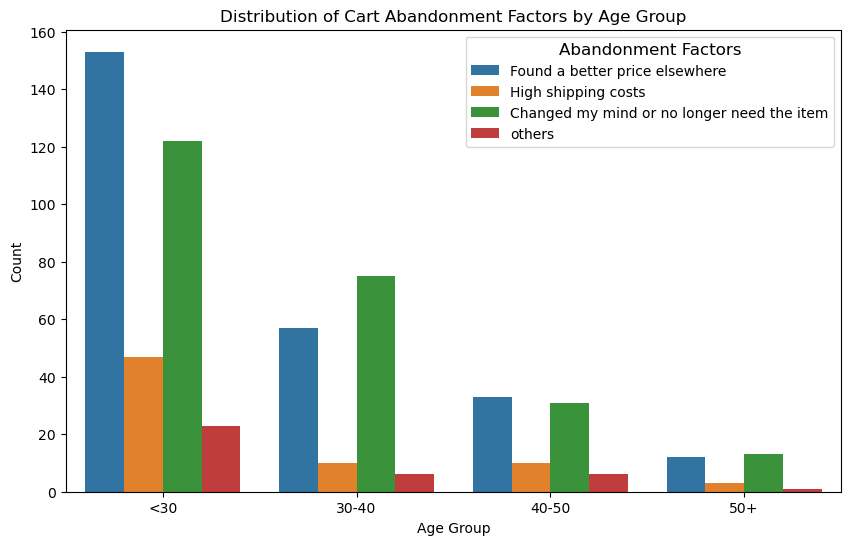

In [12]:
# Distribution of Cart Abandonment Factors by Age Group

# Create a mapping of categorical values to numerical values
factor_mapping = {
    'Found a better price elsewhere': 1,
    'Changed my mind or no longer need the item': 2,
    'High shipping costs': 3,
    'others': 4
}

# Apply the mapping to create a numerical column
carts_df['Adjust_Cart_Abandonment_Factors'] = carts_df['Cart_Abandonment_Factors'].map(factor_mapping)

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(carts_df['age'], carts_df['Adjust_Cart_Abandonment_Factors'])

# Define Age Groups
age_bins = [0, 30, 40, 50, float("inf")]
age_labels = ['<30', '30-40', '40-50', '50+']

# Create a new column to store the Age Groups
carts_df['Age_Group'] = pd.cut(carts_df['age'], bins=age_bins, labels=age_labels)

# Create a count plot to visualize the Distribution of Cart Abandonment Factors by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=carts_df, x='Age_Group', hue='Cart_Abandonment_Factors')
plt.title('Distribution of Cart Abandonment Factors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Abandonment Factors', title_fontsize='12')

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")
plt.show()

**Distribution of Cart Abandonment Factors by Age Group** "Changed my mind or no longer need the item" has the highest frequency in the '30-40' and '50+' age categories but still is a common abandonment factor across all age groups."Found a better price elsewhere" is a significant abandonment factor in the '<30' and '40-50' age groups. This may indicate that younger and middle-aged customers are more price-sensitive and actively search for better deals."High shipping costs" as an abandonment factor is relatively less frequent but still notable in the '30-40' and '50+' age groups. This suggests that shipping costs might be a more significant concern for these age groups.The '50+' age group exhibits a higher frequency of abandonment factors overall, with a notable presence of both "Changed my mind or no longer need the item" and "Found a better price elsewhere." This may reflect the diverse shopping preferences and behaviors of older customers.

**Correlation with Age** The Pearson correlation coefficient suggests a weak positive correlation between age and cart abandonment factors. This indicates that as age increases, the cart abandonment factors tend to increase slightly. However, the correlation is not strong, indicating that age alone is not a highly predictive factor for cart abandonment.

In [13]:
# Calculatibg the abandonment and completion rates
total_carts = len(carts_df)

mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}


# Adjusting the values of Cart_Completion_Frequency
carts_df['Adjusted_Frequency'] = carts_df['Cart_Completion_Frequency'].map(mapping)

# Set a threshold for defining abandonment and completion
threshold = 2

sometimes_distribution = 0.5 * len(carts_df[carts_df['Cart_Completion_Frequency'] == 'Sometimes'])    
abandoned_count = (carts_df['Adjusted_Frequency'] < threshold).sum() + sometimes_distribution
completed_count = (carts_df['Adjusted_Frequency'] > threshold).sum() + sometimes_distribution
abandonment_rate = abandoned_count / (abandoned_count + completed_count) * 100
completion_rate = 100 - abandonment_rate

# Print the results
print(f"Total Records: {total_carts}")
print(f"Abandoned Carts: {abandoned_count}")
print(f"Completed Carts: {completed_count}")
print(f"Cart Abandonment Rate: {abandonment_rate:.2f}%")
print(f"Cart Completion Rate: {completion_rate:.2f}%")


Total Records: 602
Abandoned Carts: 245.0
Completed Carts: 357.0
Cart Abandonment Rate: 40.70%
Cart Completion Rate: 59.30%


**Cart abandonment and completion rates** The analysis suggest that a significant portion (40.70%) of the shopping carts are abandoned. This indicates that many customers start the shopping process but do not complete their purchases.On the positive side, 59.30% of the shopping carts are completed. This indicates that a majority of customers do go through with their purchases.

In [14]:
# Calculate abandonment and completion rates by gender
gender_grouped = carts_df.groupby('Gender')
abandoned_counts = gender_grouped['Adjusted_Frequency'].apply(lambda x: ((x < threshold).sum() + 0.5 * (x == 2).sum()))
completed_counts = gender_grouped['Adjusted_Frequency'].apply(lambda x: ((x > threshold).sum() + 0.5 * (x == 2).sum()))

# Calculate abandonment and completion rates by gender
abandonment_rates = (abandoned_counts / (abandoned_counts + completed_counts)) * 100
completion_rates = 100 - abandonment_rates

# Print the results
print(f"Abandoned Carts by Gender: \n{abandoned_counts}")
print(f"Completed Carts by Gender: \n{completed_counts}")
print(f"Cart Abandonment Rate by Gender:")
print(abandonment_rates)
print(f"Cart Completion Rate by Gender:")
print(completion_rates)

Abandoned Carts by Gender: 
Gender
Female               146.0
Male                  54.0
Others                 6.5
Prefer not to say     38.5
Name: Adjusted_Frequency, dtype: float64
Completed Carts by Gender: 
Gender
Female               206.0
Male                  88.0
Others                12.5
Prefer not to say     50.5
Name: Adjusted_Frequency, dtype: float64
Cart Abandonment Rate by Gender:
Gender
Female               41.477273
Male                 38.028169
Others               34.210526
Prefer not to say    43.258427
Name: Adjusted_Frequency, dtype: float64
Cart Completion Rate by Gender:
Gender
Female               58.522727
Male                 61.971831
Others               65.789474
Prefer not to say    56.741573
Name: Adjusted_Frequency, dtype: float64


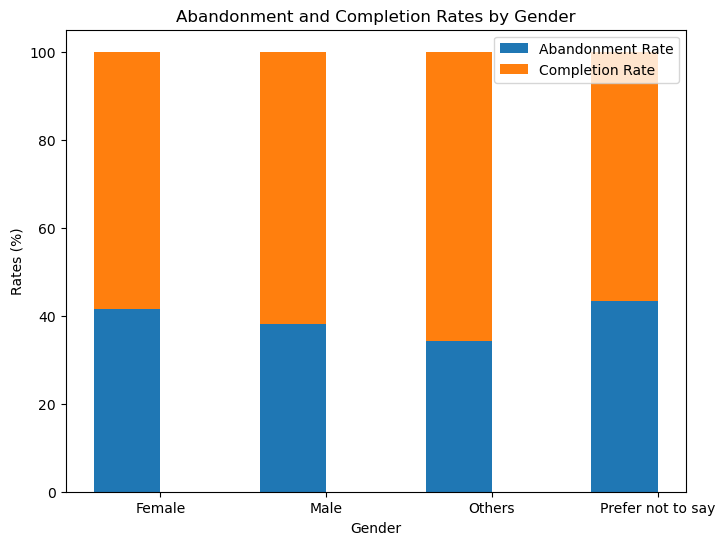

In [15]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.4
x = range(len(abandoned_counts))
plt.bar(x, abandonment_rates, width, label='Abandonment Rate')
plt.bar(x, completion_rates, width, label='Completion Rate', bottom=abandonment_rates)

plt.xlabel('Gender')
plt.ylabel('Rates (%)')
plt.title('Abandonment and Completion Rates by Gender')
plt.xticks([i + width / 2 for i in x], gender_grouped.groups.keys())
plt.legend()

plt.show()

**Cart abandonment rates by gender** The analysis shows the number of abandoned carts by gender. Females have the highest number of abandoned carts, followed by males. "Others" and "Prefer not to say" categories have fewer abandoned carts.The abandonment rate is calculated as the percentage of abandoned carts relative to the total number of carts for each gender. Females have the highest abandonment rate (41.48%), while "Others" have the lowest (34.21%).

**Cart completion rates by gender** The data reveals the number of completed carts by gender. Again, females lead with 206 completed carts, followed by males with 88. The "Others" and "Prefer not to say" categories also have lower numbers of completed carts.The completion rate is calculated as 100% minus the abandonment rate. It represents the likelihood of completing the cart based on gender. Males have the highest completion rate (61.97%) while "Prefer not to say" have the lowest (56.74%).

Average Adjusted_Add_to_Cart: 1.13
Median Adjusted_Add_to_Cart: 1.0
Standard Deviation: 0.76
Pearson Correlation Coefficient: 0.16


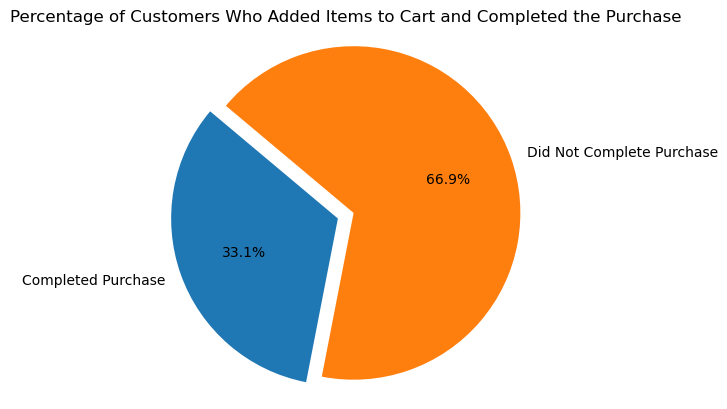

In [16]:
# Customers who added items to the cart and completed the purchase
total_customers = len(carts_df)

# Adjust the values of "Add_to_Cart_Browsing" and "Cart_Completion_Frequency"
add_to_cart_mapping = {
    'No': 0,
    'Maybe': 1,
    'Yes': 2
}
carts_df['Adjusted_Add_to_Cart'] = carts_df['Add_to_Cart_Browsing'].map(add_to_cart_mapping)
completed_customers = len(carts_df[(carts_df['Adjusted_Add_to_Cart'] == 2) & (carts_df['Adjusted_Frequency'] >= threshold)])
percentage_completed = (completed_customers / total_customers) * 100

# Summary statistics
average_frequency = carts_df['Adjusted_Add_to_Cart'].mean()
median_frequency = carts_df['Adjusted_Add_to_Cart'].median()
std_deviation = carts_df['Adjusted_Add_to_Cart'].std()

# Calculate the Pearson correlation coefficient
correlation = carts_df['Adjusted_Add_to_Cart'].corr(carts_df['Adjusted_Frequency'])

# Create a pie chart
labels = ['Completed Purchase', 'Did Not Complete Purchase']
sizes = [percentage_completed, 100 - percentage_completed] 
explode = (0.1, 0) 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal') 
plt.title('Percentage of Customers Who Added Items to Cart and Completed the Purchase')


# Print the results
print(f"Average Adjusted_Add_to_Cart: {average_frequency:.2f}")
print(f"Median Adjusted_Add_to_Cart: {median_frequency}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Pearson Correlation Coefficient: {correlation:.2f}")plt.show()

**Percentage of Customers Who Added Items to Cart and Completed the Purchase** The majority of customers did not complete their purchase after adding items to the cart.The average and median adjusted add-to-cart frequencies suggest that, on average, customers add items to the cart occasionally. The standard deviation indicates that there is some variation in how often customers add items to the cart.
The Pearson correlation coefficient of 0.16 suggests a weak positive correlation between the frequency of adding items to the cart and the frequency of completing a purchase.Customers who add items to the cart more frequently tend to complete purchases more often, but the relationship is not very strong.

Average Adjusted Saved-for-Later Frequency: 2.11
Median Adjusted Saved-for-Later Frequency: 2.0
Standard Deviation: 1.07
Pearson Correlation Coefficient: 0.06


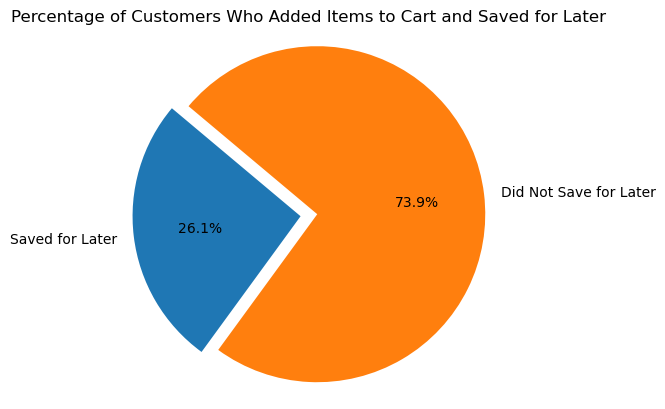

In [17]:
# Customers who added items to the cart and saved for later
saved_for_later_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    'Always': 4
}
carts_df['Adjusted_Saved_for_Later'] = carts_df['Saveforlater_Frequency'].map(saved_for_later_mapping)
saved_for_later_customers = len(carts_df[(carts_df['Adjusted_Saved_for_Later'] > 1) & (carts_df['Adjusted_Add_to_Cart'] >= threshold)])
percentage_saved_for_later = (saved_for_later_customers / total_customers) * 100

# Summary statistics
average_frequency = carts_df['Adjusted_Saved_for_Later'].mean()
median_frequency = carts_df['Adjusted_Saved_for_Later'].median()
std_deviation = carts_df['Adjusted_Saved_for_Later'].std()

# Calculate the Pearson correlation coefficient
correlation = carts_df['Adjusted_Saved_for_Later'].corr(carts_df['Adjusted_Add_to_Cart'])

# Create a pie chart
labels = ['Saved for Later', 'Did Not Save for Later']
sizes = [percentage_saved_for_later, 100 - percentage_saved_for_later] 
explode = (0.1, 0) 

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal') 
plt.title('Percentage of Customers Who Added Items to Cart and Saved for Later')

# Print the results
print(f"Average Adjusted Saved-for-Later Frequency: {average_frequency:.2f}")
print(f"Median Adjusted Saved-for-Later Frequency: {median_frequency}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
plt.show()

**Customers who added items to the cart and saved for later** The majority of customers did not save items for later after adding them to the cart.The average and median of saved for later frequencies suggest that, on average, customers save items for later approximately 2.11 times.The standard deviation indicates that there is some variation in how often customers save items for later.
The Pearson correlation coefficient of 0.06 suggests a weak positive correlation between the frequency of adding items to the cart and the frequency of saving items for later.Customers who add items to the cart more frequently tend to save items for later slightly more often, but the relationship is not very strong.